In [1]:
import numpy as np
import matplotlib.pyplot as plt
a=np.arange(25)
print(a)
print("\n")
print(a[::2])
print("\n")
print(a[1::2])
print("\n")
#print(a[::2,::2])#??
a_2d = a.reshape(5, 5) 
print(a_2d)
print("\n")
print(a_2d[::2, ::2])
print("\n")
print(a_2d[1::2, 1::2])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


[ 0  2  4  6  8 10 12 14 16 18 20 22 24]


[ 1  3  5  7  9 11 13 15 17 19 21 23]


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


[[ 0  2  4]
 [10 12 14]
 [20 22 24]]


[[ 6  8]
 [16 18]]


In [3]:
# result = a_2d[::2, :][:, [1, 3]]
result = a_2d[::2,][:,[0,2]]#first slices one working for rows, second working on column
result

array([[ 0,  2],
       [10, 12],
       [20, 22]])

In [19]:
import numpy as np
import matplotlib.pyplot as plt

mat = np.zeros([5,5,3], dtype=np.uint8)

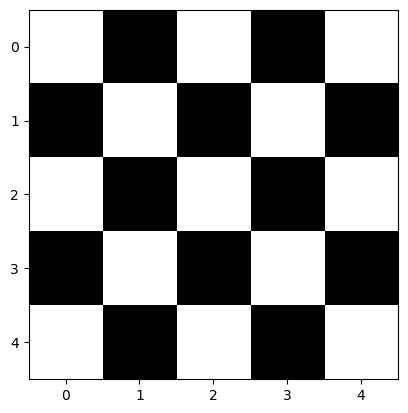

In [23]:
mat
plt.imshow(mat)
for i in range(5):
    for j in range(5):
        if (i + j) % 2 == 0:
            mat[i, j] = [255, 255, 255]

plt.imshow(mat)

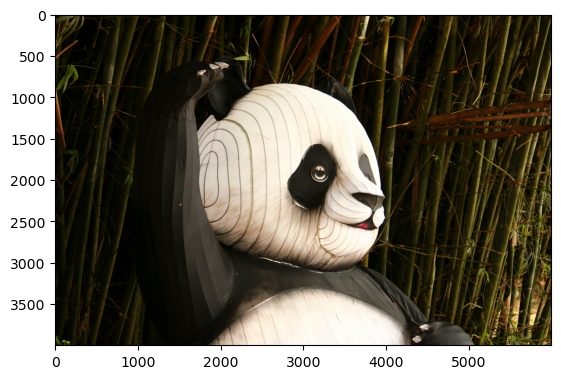

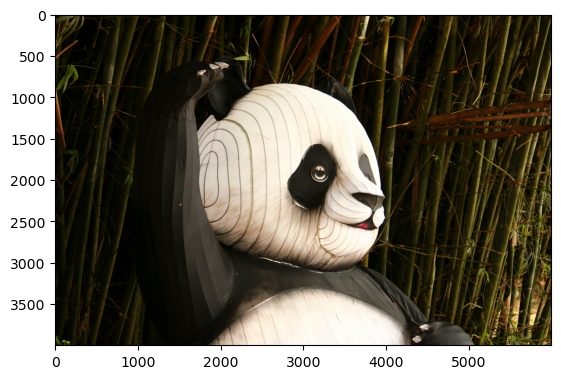

72000000 (4000, 6000, 3)
72000000 (4000, 6000, 3)
[[[ 29  35   7]
  [ 26  32   4]
  [ 29  35   7]
  ...
  [ 21  20   0]
  [ 16  18   0]
  [ 15  17   0]]

 [[ 33  39  11]
  [ 28  34   6]
  [ 28  34   6]
  ...
  [ 22  21   1]
  [ 19  21   0]
  [ 19  21   0]]

 [[ 37  43  15]
  [ 30  36   8]
  [ 27  33   5]
  ...
  [ 23  22   2]
  [ 23  22   2]
  [ 22  24   3]]

 ...

 [[  9  11   0]
  [  8  10   0]
  [  7  11   0]
  ...
  [119 119  33]
  [107 103  29]
  [ 68  63   0]]

 [[ 10  12   1]
  [  8  11   0]
  [  8  11   0]
  ...
  [101 102  22]
  [ 73  70   3]
  [ 45  40   0]]

 [[ 10  13   2]
  [ 10  13   2]
  [  9  12   1]
  ...
  [ 70  71   0]
  [ 43  39   0]
  [ 31  25   0]]]


ValueError: x must have 2 or fewer dimensions

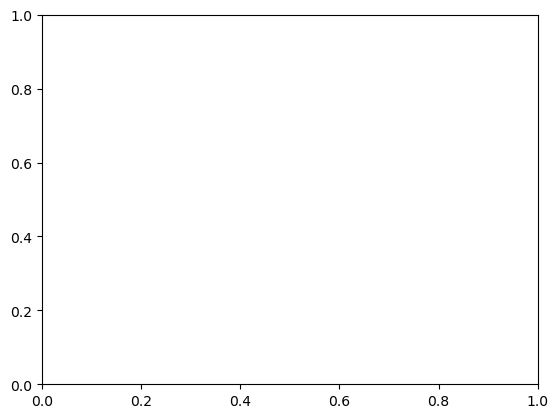

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter, sobel

img = plt.imread('./blond-fox-vCHoJRQEDyY-unsplash.jpg')
plt.imshow(img)
plt.show()
img_array = np.array(img)
plt.imshow(img_array)
plt.show()
img_array = img_array.astype(np.uint8)

print(img_array.size, img_array.shape)
print(img.size,img.shape)
print(img_array)
plt.hist(img_array[::2])

Image shape: (4000, 6000, 3)
Image size: 72000000
Data type: uint8
Sample pixel [0,0]: [29 35  7]


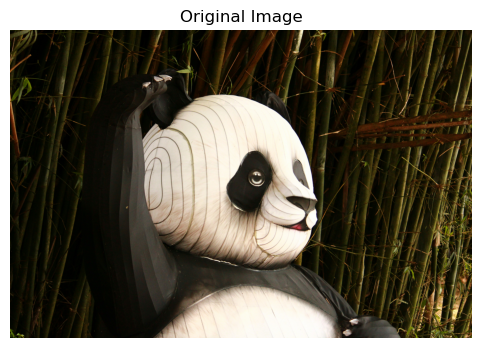

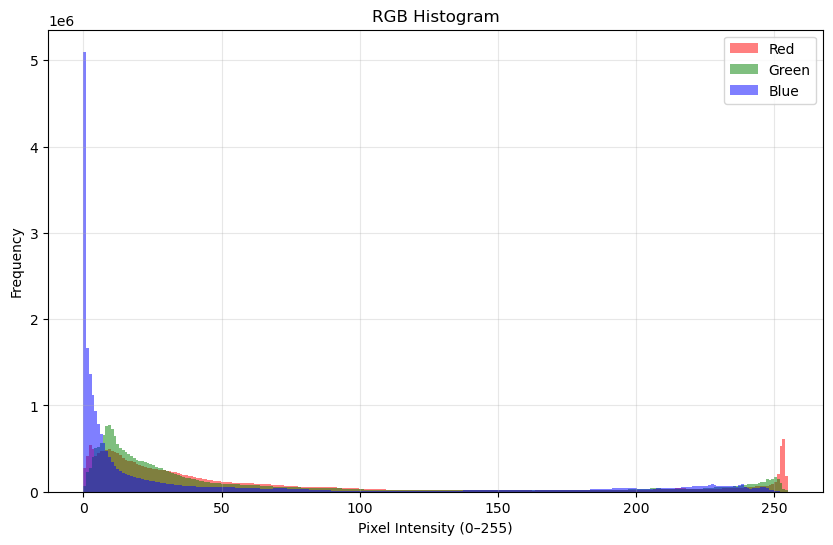

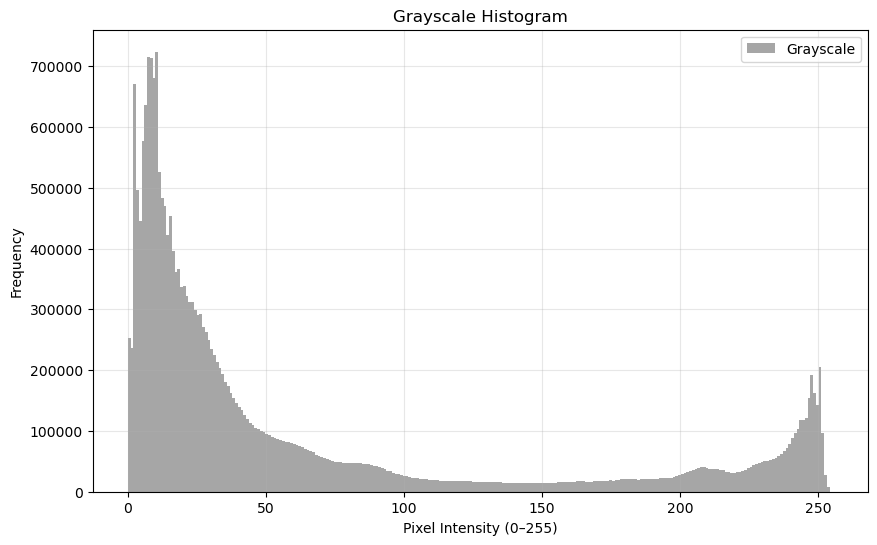

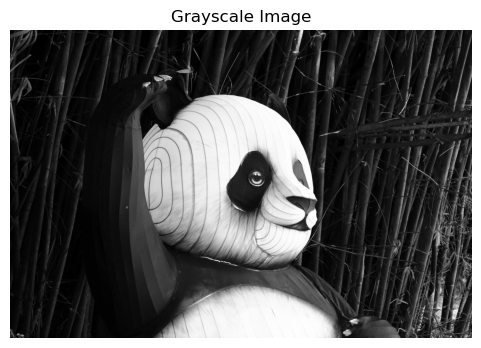

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('./blond-fox-vCHoJRQEDyY-unsplash.jpg')
img_array = img  # No need for np.array(img), as img is already a NumPy array

# Print array info
print("Image shape:", img_array.shape)
print("Image size:", img_array.size)
print("Data type:", img_array.dtype)
print("Sample pixel [0,0]:", img_array[0, 0])

# Check if image is float (0–1) and convert to uint8 (0–255) if needed
if img_array.dtype == np.float32 or img_array.dtype == np.float64:
    img_array = (img_array * 255).astype(np.uint8)

# Display the original image
plt.figure(figsize=(6, 4))
plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Create histograms for RGB channels
plt.figure(figsize=(10, 6))
# Red channel
plt.hist(img_array[:, :, 0].ravel(), bins=256, color='red', alpha=0.5, label='Red', range=(0, 255))
# Green channel
plt.hist(img_array[:, :, 1].ravel(), bins=256, color='green', alpha=0.5, label='Green', range=(0, 255))
# Blue channel
plt.hist(img_array[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', range=(0, 255))
plt.title("RGB Histogram")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Convert to grayscale and create histogram
gray_weights = np.array([0.2989, 0.5870, 0.1140])  # Standard grayscale coefficients
gray_img = np.dot(img_array, gray_weights).astype(np.uint8)
plt.figure(figsize=(10, 6))
plt.hist(gray_img.ravel(), bins=256, color='gray', alpha=0.7, label='Grayscale', range=(0, 255))
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Display grayscale image
plt.figure(figsize=(6, 4))
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

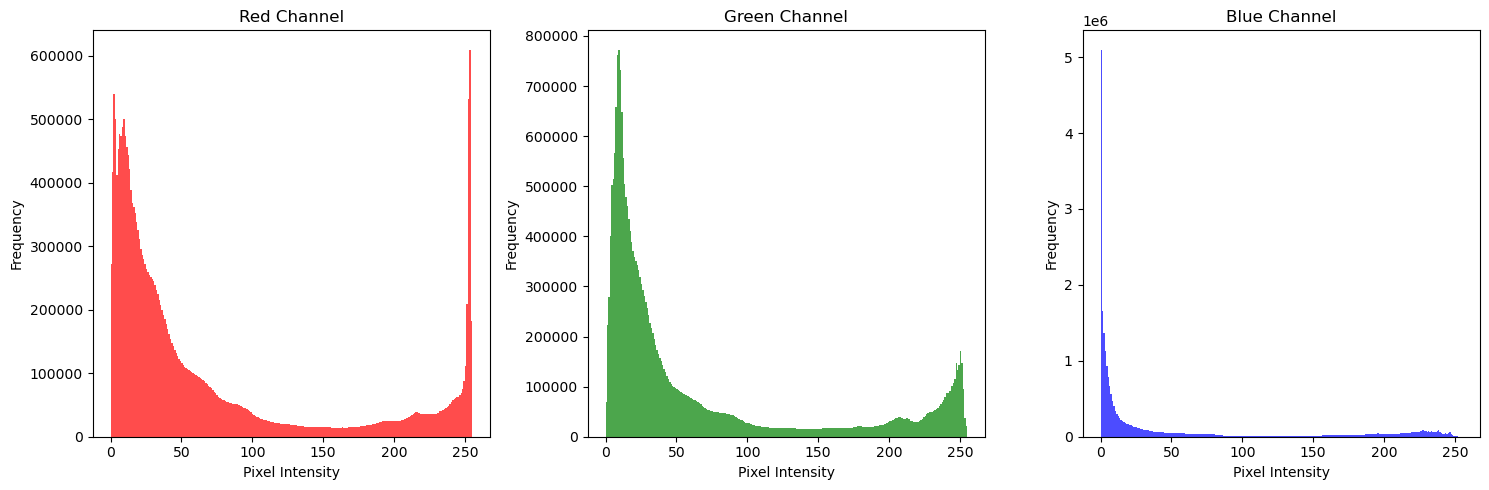

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    axes[i].hist(img_array[:, :, i].ravel(), bins=256, color=color, alpha=0.7, range=(0, 255))
    axes[i].set_title(f"{color.capitalize()} Channel")
    axes[i].set_xlabel("Pixel Intensity")
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

Image shape: (4000, 6000, 3)
Data type: uint8
Image size: 72000000
Sample pixel [0,0]: [29 35  7]

Sliced region shape: (200, 200, 3)


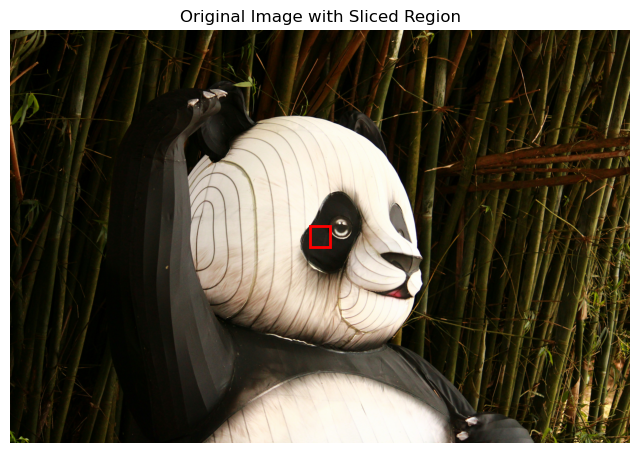

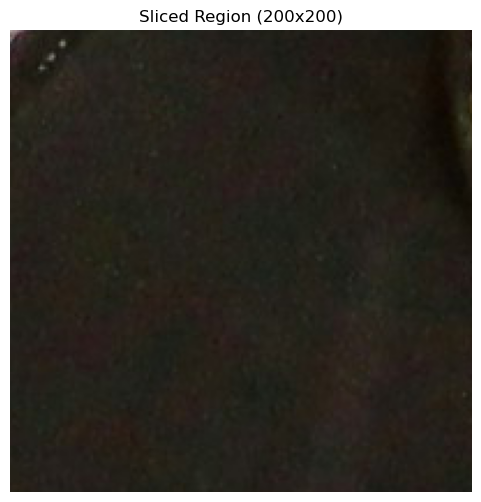

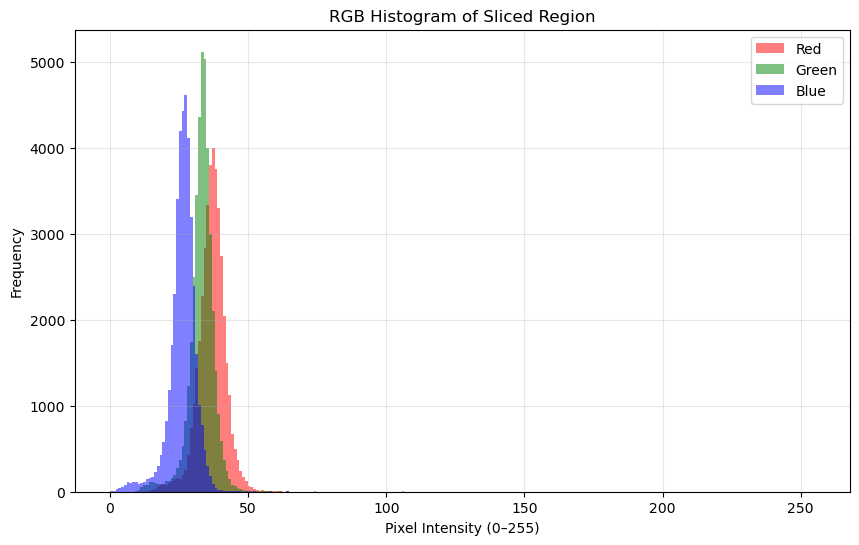

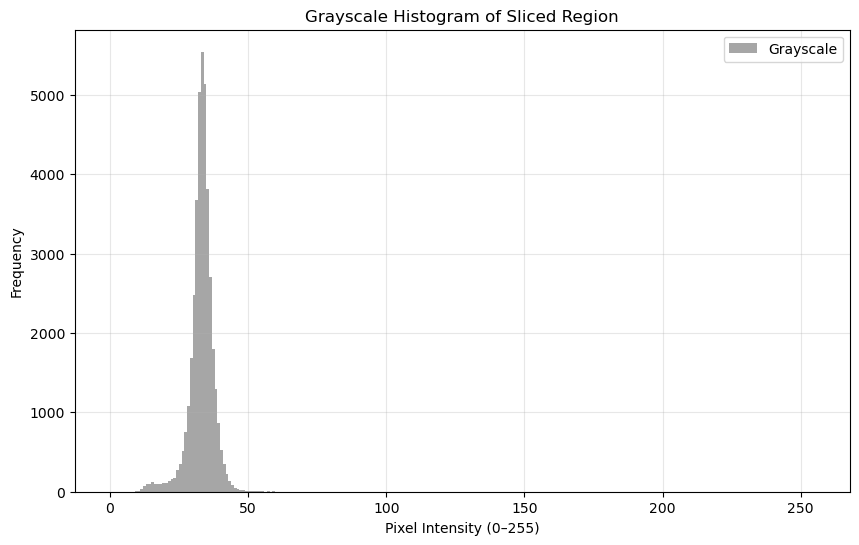

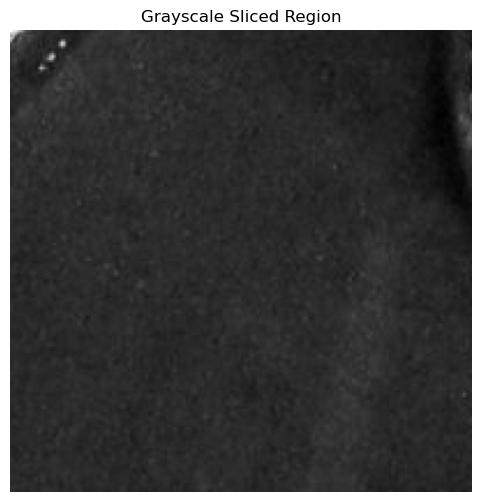

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image
try:
    img_array = plt.imread('./blond-fox-vCHoJRQEDyY-unsplash.jpg')
except FileNotFoundError:
    print("Image not found. Using a random placeholder image.")
    img_array = np.random.randint(0, 256, (1000, 1000, 3), dtype=np.uint8)

# Check and convert dtype if needed
print("Image shape:", img_array.shape)
print("Data type:", img_array.dtype)
if img_array.dtype == np.float32 or img_array.dtype == np.float64:
    img_array = (img_array * 255).astype(np.uint8)
print("Image size:", img_array.size)
print("Sample pixel [0,0]:", img_array[0, 0])

# Define the slice region (e.g., 200x200 pixels from the center)
height, width, _ = img_array.shape
size = 200  # Size of square region
y_start = (height - size) // 2  # Center vertically
y_stop = y_start + size
x_start = (width - size) // 2  # Center horizontally
x_stop = x_start + size

# Slice the region
sliced_img = img_array[y_start:y_stop, x_start:x_stop, :]
print("\nSliced region shape:", sliced_img.shape)

# Display original image with rectangle
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img_array)
rect = patches.Rectangle((x_start, y_start), size, size, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)
ax.set_title("Original Image with Sliced Region")
ax.axis('off')
plt.show()

# Display sliced image
plt.figure(figsize=(6, 6))
plt.imshow(sliced_img)
plt.title(f"Sliced Region ({size}x{size})")
plt.axis('off')
plt.show()

# RGB histograms for sliced region
plt.figure(figsize=(10, 6))
plt.hist(sliced_img[:, :, 0].ravel(), bins=256, color='red', alpha=0.5, label='Red', range=(0, 255))
plt.hist(sliced_img[:, :, 1].ravel(), bins=256, color='green', alpha=0.5, label='Green', range=(0, 255))
plt.hist(sliced_img[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', range=(0, 255))
plt.title("RGB Histogram of Sliced Region")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Grayscale histogram for sliced region
gray_weights = np.array([0.2989, 0.5870, 0.1140])  # Standard grayscale coefficients
gray_sliced = np.dot(sliced_img, gray_weights).astype(np.uint8)
plt.figure(figsize=(10, 6))
plt.hist(gray_sliced.ravel(), bins=256, color='gray', alpha=0.7, label='Grayscale', range=(0, 255))
plt.title("Grayscale Histogram of Sliced Region")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Display grayscale sliced image
plt.figure(figsize=(6, 6))
plt.imshow(gray_sliced, cmap='gray')
plt.title("Grayscale Sliced Region")
plt.axis('off')
plt.show()